  Image enhancement methods are techniques used to improve the quality and visual appearance of digital images. These methods aim to increase the perceptual quality of an image, making it more visually appealing, easier to interpret, or better suited to a particular application. There are many different image enhancement methods available, each with its own strengths and weaknesses. Some of the most common techniques include:

1- Contrast Enhancement: This method involves increasing the difference between the darkest and lightest areas of an image. This can improve the overall clarity and detail of an image.

2- Sharpening: This method involves increasing the clarity of an image by selectively enhancing its edges. This can make an image appear crisper and more defined.

3- Color Correction: This method involves adjusting the color balance of an image to correct for inaccuracies or inconsistencies in the original image.

4- Noise Reduction: This method involves removing or reducing the amount of noise in an image, which can improve its visual quality and clarity.

There are many reasons why we might need to use image enhancement methods. For example:

1- To improve the visual quality of an image for aesthetic purposes, such as in photography or digital art.

2- To improve the interpretability of an image in scientific or medical applications, such as in microscopy or radiology.

3- To prepare images for use in automated systems, such as in machine learning or computer vision applications.

4- To compensate for limitations in imaging technology, such as low light or low resolution.

Overall, image enhancement methods can help us to improve the quality and visual appeal of digital images, making them more useful and effective for a wide range of applications.

### 1- Filtering

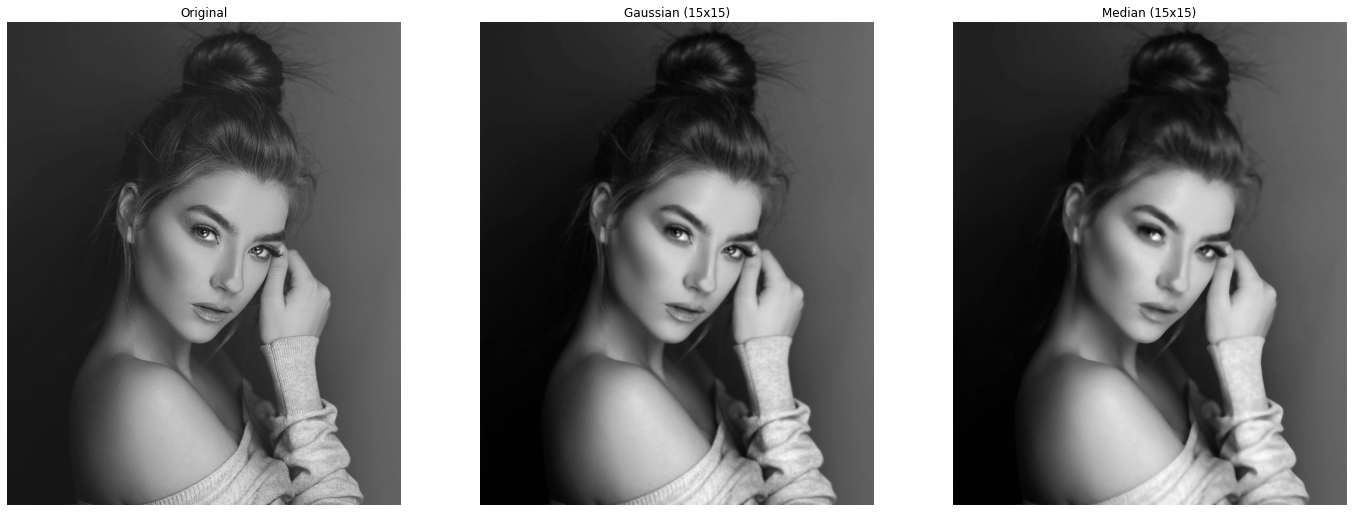

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/pexels-photo-2787341.jpeg', cv2.IMREAD_GRAYSCALE)

# Filtering Methods
gaussian = cv2.GaussianBlur(img, (15,15), 0)
median = cv2.medianBlur(img, 15)

# Visualization
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,24))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(gaussian, cmap='gray')
axs[1].set_title('Gaussian (15x15)')
axs[1].axis('off')

axs[2].imshow(median, cmap='gray')
axs[2].set_title('Median (15x15)')
axs[2].axis('off')

plt.show()


### 2- Contrast Enhancement

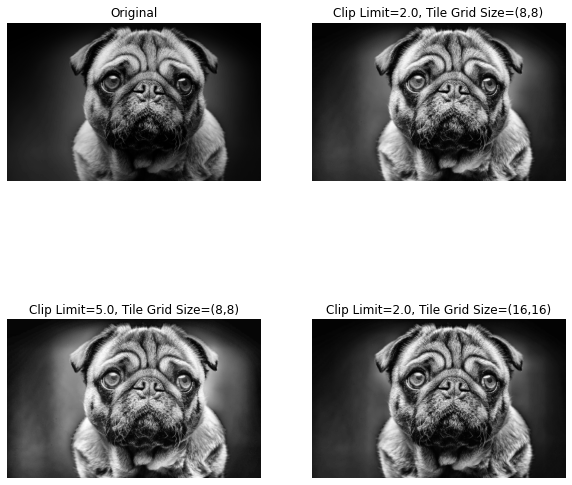

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/content/header_essay-final-gettyimages-685469924.jpg', 0)


clahe1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe2 = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
clahe3 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
eq1 = clahe1.apply(img)
eq2 = clahe2.apply(img)
eq3 = clahe3.apply(img)

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original Image
axs[0,0].imshow(img, cmap='gray')
axs[0,0].set_title('Original')
axs[0,0].axis('off')

# Enhanced (CLAHE) image - clipLimit=2.0, tileGridSize=(8,8)
axs[0,1].imshow(eq1, cmap='gray')
axs[0,1].set_title('Clip Limit=2.0, Tile Grid Size=(8,8)')
axs[0,1].axis('off')

# Enhanced (CLAHE) image - clipLimit=5.0, tileGridSize=(8,8)
axs[1,0].imshow(eq2, cmap='gray')
axs[1,0].set_title('Clip Limit=5.0, Tile Grid Size=(8,8)')
axs[1,0].axis('off')

# Enhanced (CLAHE) image - clipLimit=2.0, tileGridSize=(16,16)
axs[1,1].imshow(eq3, cmap='gray')
axs[1,1].set_title('Clip Limit=2.0, Tile Grid Size=(16,16)')
axs[1,1].axis('off')

plt.show()


### 3- Sharpening

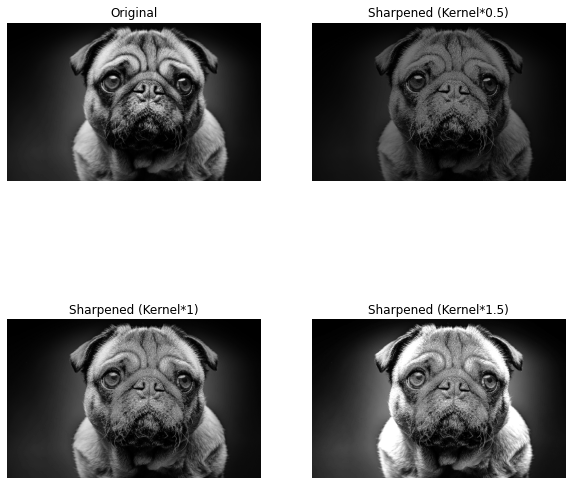

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/content/header_essay-final-gettyimages-685469924.jpg', 0)

# Sharpening filter
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

# Different level of sharpening method
sharpen1 = cv2.filter2D(img, -1, kernel*0.5)
sharpen2 = cv2.filter2D(img, -1, kernel*1)
sharpen3 = cv2.filter2D(img, -1, kernel*1.5)

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original Image
axs[0,0].imshow(img, cmap='gray')
axs[0,0].set_title('Original')
axs[0,0].axis('off')

# Sharpened Image - kernel*0.5
axs[0,1].imshow(sharpen1, cmap='gray')
axs[0,1].set_title('Sharpened (Kernel*0.5)')
axs[0,1].axis('off')

# Sharpened Image - kernel*1
axs[1,0].imshow(sharpen2, cmap='gray')
axs[1,0].set_title('Sharpened (Kernel*1)')
axs[1,0].axis('off')

# Sharpened Image - kernel*1.5
axs[1,1].imshow(sharpen3, cmap='gray')
axs[1,1].set_title('Sharpened (Kernel*1.5)')
axs[1,1].axis('off')

plt.show()


### 4- Color Correction

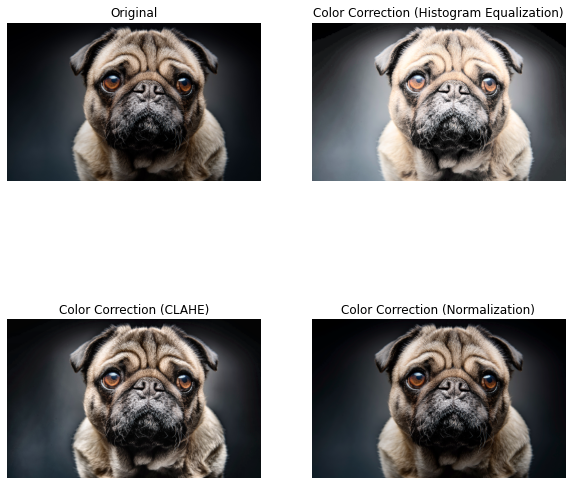

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/content/header_essay-final-gettyimages-685469924.jpg')

# Color correction
cc1 = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cc1[:,:,0] = cv2.equalizeHist(cc1[:,:,0])
cc1 = cv2.cvtColor(cc1, cv2.COLOR_LAB2BGR)

cc2 = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cc2[:,:,0] = clahe.apply(cc2[:,:,0])
cc2 = cv2.cvtColor(cc2, cv2.COLOR_LAB2BGR)

cc3 = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cc3[:,:,0] = cv2.normalize(cc3[:,:,0], None, 0, 255, cv2.NORM_MINMAX)
cc3 = cv2.cvtColor(cc3, cv2.COLOR_LAB2BGR)

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original image
axs[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0,0].set_title('Original')
axs[0,0].axis('off')

# Image with color correction applied - Histogram Equalization
axs[0,1].imshow(cv2.cvtColor(cc1, cv2.COLOR_BGR2RGB))
axs[0,1].set_title('Color Correction (Histogram Equalization)')
axs[0,1].axis('off')

# Image with color correction applied - CLAHE
axs[1,0].imshow(cv2.cvtColor(cc2, cv2.COLOR_BGR2RGB))
axs[1,0].set_title('Color Correction (CLAHE)')
axs[1,0].axis('off')

# Image with color correction applied - Normalization
axs[1,1].imshow(cv2.cvtColor(cc3, cv2.COLOR_BGR2RGB))
axs[1,1].set_title('Color Correction (Normalization)')
axs[1,1].axis('off')

plt.show()
